In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import PIL
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [3]:
# Reading XML files and returning image name and bounding-box coordinates
def return_name_bbox(xml_file):
    tree = ET.parse(xml_file)
    root  = tree.getroot()

    image_name = root.find("filename").text
    bbox = {
        "xmin" : int(root.find('object/bndbox/xmin').text),
        "ymin" : int(root.find('object/bndbox/ymin').text),
        "xmax" : int(root.find('object/bndbox/xmax').text),
        "ymax" : int(root.find('object/bndbox/ymax').text)
    }
    return image_name,bbox

In [4]:
xml_file_path = os.listdir("D:/Development/Dataset/Car_Plate_segmentation/annotations")
xml_file_path = [f"D:/Development/Dataset/Car_Plate_segmentation/annotations/{xml}" for xml in xml_file_path ]

# image_file_path = os.listdir("D:/Development/Dataset/Car_Plate_segmentation/images")
# image_file_path = [f"D:/Development/Dataset/Car_Plate_segmentation/images/{img}" for img in image_file_path]
data = []
for xml_file in xml_file_path:
    name , bbox = return_name_bbox(xml_file)
    data.append([f"D:/Development/Dataset/Car_Plate_segmentation/images/{name}", bbox])

df = pd.DataFrame(data, columns=['ImagePath', 'BBox'])

df.head()

,ImagePath,BBox
0,D:/Development/Dataset/Car_Plate_segmentation/...,"{'xmin': 226, 'ymin': 125, 'xmax': 419, 'ymax'..."
1,D:/Development/Dataset/Car_Plate_segmentation/...,"{'xmin': 134, 'ymin': 128, 'xmax': 262, 'ymax'..."
2,D:/Development/Dataset/Car_Plate_segmentation/...,"{'xmin': 140, 'ymin': 5, 'xmax': 303, 'ymax': ..."
3,D:/Development/Dataset/Car_Plate_segmentation/...,"{'xmin': 175, 'ymin': 114, 'xmax': 214, 'ymax'..."
4,D:/Development/Dataset/Car_Plate_segmentation/...,"{'xmin': 167, 'ymin': 202, 'xmax': 240, 'ymax'..."


In [5]:
train, test = train_test_split(df, test_size=0.1, random_state=1)

In [6]:
def normalize_bbox(bbox, image_shape):
    width, height = image_shape[1], image_shape[0]
    return [
        bbox['xmin'] / width,
        bbox['ymin'] / height,
        bbox['xmax'] / width,
        bbox['ymax'] / height
    ]

In [7]:
train_images = []
train_labels = []


for name , row in train.iterrows():
    img = load_img(row['ImagePath'])
    img_array = img_to_array(img) / 255.0  
    
    # Normalize images for 512x512 image
    bbox = row['BBox']
    normalized_bbox = normalize_bbox(bbox, img_array.shape)
    print(normalized_bbox) 


    img = img.resize((512, 512))  # Resize images to a fixed size
    img_array = img_to_array(img) / 255.0  # Normalize images
    train_images.append(img_array)

    label =normalized_bbox  # Assuming "fracture found" is always 1 for this example
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

[0.3725, 0.5542168674698795, 0.6525, 0.6355421686746988]
[0.5, 0.49666666666666665, 0.6275, 0.5566666666666666]
[0.3775, 0.6133333333333333, 0.6375, 0.7066666666666667]
[0.18666666666666668, 0.398, 0.6933333333333334, 0.542]
[0.39097744360902253, 0.405, 0.5538847117794486, 0.4975]
[0.235, 0.24888888888888888, 0.765, 0.7511111111111111]
[0.0725, 0.64, 0.1425, 0.6766666666666666]
[0.825, 0.5692883895131086, 0.915, 0.6704119850187266]
[0.23, 0.700374531835206, 0.3425, 0.7752808988764045]
[0.285, 0.395, 0.5725, 0.505]
[0.3, 0.700374531835206, 0.8125, 0.8239700374531835]
[0.6025, 0.6046511627906976, 0.72, 0.6810631229235881]
[0.39, 0.36666666666666664, 0.6075, 0.53]
[0.418, 0.45, 0.566, 0.5633333333333334]
[0.13, 0.6640625, 0.1825, 0.7109375]
[0.10571428571428572, 0.5513307984790875, 0.9114285714285715, 0.7718631178707225]
[0.81, 0.54, 0.9375, 0.5833333333333334]
[0.37, 0.6866666666666666, 0.705, 0.7933333333333333]
[0.05, 0.29, 0.9, 0.5166666666666667]
[0.13733075435203096, 0.6765676567656

In [8]:
test_images = []
test_labels = []

for name , row in test.iterrows():
    img = load_img(row['ImagePath'])
    img_array = img_to_array(img) / 255.0  
    
    # Normalize images for 512x512 image
    bbox = row['BBox']
    normalized_bbox = normalize_bbox(bbox, img_array.shape)
    print(normalized_bbox) 


    img = img.resize((512, 512))  # Resize images to a fixed size
    img_array = img_to_array(img) / 255.0  # Normalize images
    test_images.append(img_array)

    label =normalized_bbox  # Assuming "fracture found" is always 1 for this example
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

[0.43523316062176165, 0.49, 0.6217616580310881, 0.5775]
[0.36, 0.38, 0.75, 0.48333333333333334]
[0.355, 0.458955223880597, 0.58, 0.6305970149253731]
[0.188135593220339, 0.18857142857142858, 0.8779661016949153, 0.7028571428571428]
[0.402, 0.5093333333333333, 0.576, 0.6133333333333333]
[0.685, 0.7259887005649718, 0.875, 0.8389830508474576]
[0.2325, 0.7682926829268293, 0.5025, 0.8983739837398373]
[0.1225, 0.6104868913857678, 0.28, 0.7228464419475655]
[0.375, 0.7033333333333334, 0.6175, 0.79]
[0.4175, 0.6733333333333333, 0.6, 0.7333333333333333]
[0.8022222222222222, 0.6185185185185185, 0.9644444444444444, 0.6777777777777778]
[0.565, 0.6033333333333334, 0.8175, 0.7]
[0.415, 0.5522388059701493, 0.5825, 0.6865671641791045]
[0.5333333333333333, 0.5284280936454849, 0.8422222222222222, 0.725752508361204]
[0.415, 0.4768392370572207, 0.5875, 0.5640326975476839]
[0.4112627986348123, 0.6253776435045317, 0.5102389078498294, 0.7009063444108762]
[0.6505747126436782, 0.8241379310344827, 0.97471264367816

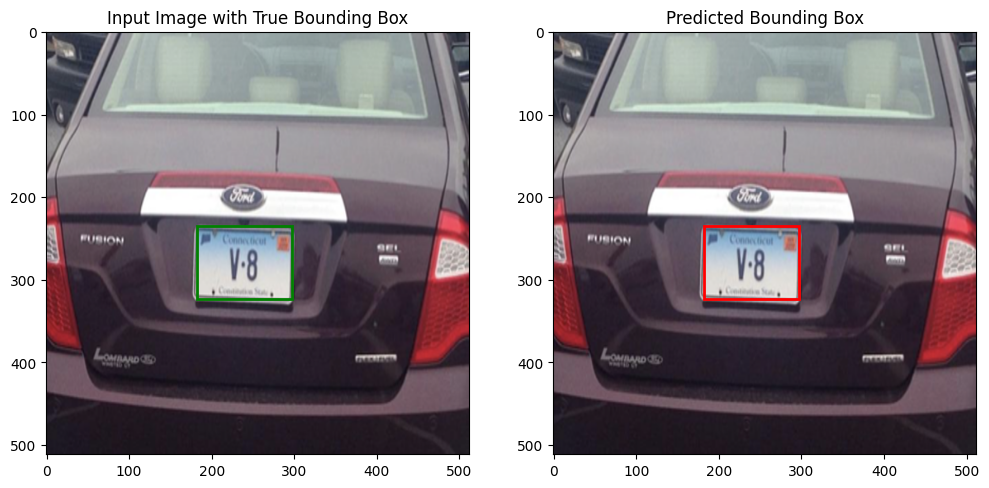

In [9]:
# Visualizing some predictions
for i in range(2, 3):
    plt.figure(figsize=(12, 6))  # Create a new figure for each image
    
    # True bounding box
    plt.subplot(1, 2, 1)
    plt.title("Input Image with True Bounding Box")
    plt.imshow(test_images[i])
    true_xmin, true_ymin, true_xmax, true_ymax = test_labels[i][:]*512
    plt.gca().add_patch(plt.Rectangle((true_xmin, true_ymin), true_xmax - true_xmin, true_ymax - true_ymin, edgecolor='g', facecolor='none', linewidth=2))  # Green box for true bounding box
    
    # Predicted bounding box
    plt.subplot(1, 2, 2)
    plt.title("Predicted Bounding Box")
    plt.imshow(test_images[i])
    xmin, ymin, xmax, ymax = test_labels[i][:]*512  # Scale back to original size
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='r', facecolor='none', linewidth=2))  # Red box for predicted bounding box

    plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


In [11]:
# """Simple Model (conv + FCL)"""
# model = Sequential()

# # Layer 1: Convolutional + MaxPooling
# model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(512, 512, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((3, 3), strides=2))

# # Layer 2: Convolutional + MaxPooling
# model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((3, 3), strides=2))

# # Layer 3: Convolutional
# model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())

# # Layer 4: Convolutional
# model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())

# # Layer 5: Convolutional + MaxPooling
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((3, 3), strides=2))

# # Layer 6: Convolutional + MaxPooling
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((3, 3), strides=2))

# # Layer 7: Convolutional + MaxPooling
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())

# # Flatten 
# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(4, activation='linear'))  # Output: [xmin, ymin, xmax, ymax]

# model.summary()


In [12]:
# ResNetModel

from tensorflow.keras.layers import Dense, BatchNormalization, MaxPool2D, Flatten, Conv2D, Input, Add, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

def resnet_block(x, filters, kernel_size=3, strides=1, downsample=False):
    shortcut = x
    conv = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    bnorm = BatchNormalization()(conv)
    relu = ReLU()(bnorm)
    conv = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    bnorm = BatchNormalization()(conv)
    relu = ReLU()(bnorm)
    conv = Conv2D(filters, kernel_size, padding='same')(relu)
    bnorm = BatchNormalization()(conv)
    
    if downsample:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(x)
        shortcut = BatchNormalization()(shortcut)
    
    add = Add()([shortcut, bnorm])
    output = ReLU()(add)
    return output

input_shape = (512, 512, 3)
x = Input(shape=input_shape)

# Initial Conv Layer
conv1 = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(x)
bNorm1 = BatchNormalization()(conv1)
maxpool1 = MaxPool2D((3, 3), strides=2)(bNorm1)

conv1 = Conv2D(128, (7, 7), strides=2, padding='same', activation='relu')(x)
bNorm1 = BatchNormalization()(conv1)
maxpool1 = MaxPool2D((3, 3), strides=2)(bNorm1)

conv1 = Conv2D(256, (7, 7), strides=2, padding='same', activation='relu')(x)
bNorm1 = BatchNormalization()(conv1)
maxpool1 = MaxPool2D((3, 3), strides=2)(bNorm1)
# Adding ResNet Blocks
res_block1 = resnet_block(maxpool1, 256)
res_block2 = resnet_block(res_block1, 256)
res_block3 = resnet_block(res_block2, 256)
res_block4 = resnet_block(res_block3, 256)
res_block5 = resnet_block(res_block4, 256)
res_block6 = resnet_block(res_block5, 256, strides=2, downsample=True)  # Downsample

# Global Average Pooling and Output
gap = Flatten()(res_block4)
hiddenLayer1 = Dense(512, activation='relu')(gap)  # Assuming 1000 classes
hiddenLayer2 = Dense(256, activation='relu')(hiddenLayer1)  # Assuming 1000 classes
hiddenLayer3 = Dense(128, activation='relu')(hiddenLayer2)  # Assuming 1000 classes
output = Dense(4, activation='softmax')(hiddenLayer3)  # Assuming 1000 classes

model = Model(inputs=x, outputs=output)

model.summary()


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images, train_labels,
    validation_split=0.2,      
    epochs=1,
    batch_size=20
)

In [ ]:
model.save("D:/PROJECT/Deep_Learning_Projects/number_plate_segmentation_val8776.h5")

# 82.20% accuracy

In [ ]:
from tensorflow.keras.models import load_model
my_model = load_model("D:/PROJECT/Deep_Learning_Projects/Car_Licence_plate_detection/testing.h5")
my_model.summary()

In [ ]:
my_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = my_model.fit(
    train_images, train_labels,
    validation_split=0.1,
    epochs=1   ,
    batch_size=10
)

In [ ]:
# from tensorflow.keras import backend as K
# import gc
# del model
# K.clear_session()
# gc.collect()


In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(test_images[:90], test_labels[:90])
print(f"test Loss: {loss}")
print(f"test Accuracy: {accuracy}")

# Predicting on test images
pred_labels = model.predict(test_images)
pred_labels*=512
print(pred_labels)
# Visualizing some predictions
for i in range(len(pred_labels)):
    plt.figure(figsize=(12, 6))  # Create a new figure for each image
    
    # True bounding box
    plt.subplot(1, 2, 1)
    plt.title("Input Image with True Bounding Box")
    plt.imshow(test_images[i])
    true_xmin, true_ymin, true_xmax, true_ymax = test_labels[i][:]*512
    plt.gca().add_patch(plt.Rectangle((true_xmin, true_ymin), true_xmax - true_xmin, true_ymax - true_ymin, edgecolor='g', facecolor='none', linewidth=2))  # Green box for true bounding box
    
    # Predicted bounding box
    plt.subplot(1, 2, 2)
    plt.title("Predicted Bounding Box")
    plt.imshow(test_images[i])
    xmin, ymin, xmax, ymax = pred_labels[i][:]  # Scale back to original size
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='r', facecolor='none', linewidth=2))  # Red box for predicted bounding box

    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(train_images[:90], train_labels[:90])
print(f"train Loss: {loss}")
print(f"train Accuracy: {accuracy}")

# Predicting on train images
pred_labels = model.predict(train_images)
pred_labels*=512
print(pred_labels)
# Visualizing some predictions
for i in range(len(pred_labels)):
    plt.figure(figsize=(12, 6))  # Create a new figure for each image
    
    # True bounding box
    plt.subplot(1, 2, 1)
    plt.title("Input Image with True Bounding Box")
    plt.imshow(train_images[i])
    true_xmin, true_ymin, true_xmax, true_ymax = train_labels[i][:]*512
    plt.gca().add_patch(plt.Rectangle((true_xmin, true_ymin), true_xmax - true_xmin, true_ymax - true_ymin, edgecolor='g', facecolor='none', linewidth=2))  # Green box for true bounding box
    
    # Predicted bounding box
    plt.subplot(1, 2, 2)
    plt.title("Predicted Bounding Box")
    plt.imshow(train_images[i])
    xmin, ymin, xmax, ymax = pred_labels[i][:]  # Scale back to original size
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='r', facecolor='none', linewidth=2))  # Red box for predicted bounding box

    plt.show()
